<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2024 - Homework 01</h1>

<h3 style="color:blue">2024-03-25</h3>

Team Members:

David Íñiguez Gómez. Email address: dinigugo108@alumnes.ub.edu

Jaime Leonardo Sánchez Salazar. Email address: jsanchsa72@alumnes.ub.edu



<h1 style="color:blue">Instructions</h1>

### Submissions:

1. By **groups** of _about_ three students (meaning: two is OK, four is not advisable but possible. Individual homeworks will also be accepted but collaborative work is preferable).

2. Please send me an **email** with the team members names by March 31.

3. Only **one copy** of each group's work must be uploaded (by any member).

4. **Full names** and **email address** of all team members must appear in the header.

### Format:

A Jupyter or an Rmd **notebook** with a **header** clearly stating the names of all contributors.

### Documentation:

1. Comments **in code cells** (e.g., meaning of variables, parameters, purpose of functions) are necessary but not sufficient.

2. You are expected to give full explanations of steps taken in your solution (in **Markdown cells**), as well as discussion of results and their meaning.

3. Do not be afraid of being too verbose or too elementary, explain as if to someone learning.

### External sources

Getting _inspiration_ from any book, document, blog, web page, even mimicking solutions given in there, is **allowed and encouraged,** provided you give a **proper reference,** understand every such material, and explain it in you own words, even more exhaustively. Do not **copy/paste literally large chunks of code** I will detect it, believe me, even missing source reference. Bleak consequences.

### Deadline:

Completed assignments are due on **Monday, April 15**. They are to be uploaded to the Virtual Campus.

<h1 style="color:blue">Exercises</h1>

## Exercise 1: Placenta previa

This exercise pertains to what we studied in `Binomial.3.Placenta.previa.pub.ipynb`.

1. Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\textrm{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in BDA3 [1]. Do the same for those $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors.

2. Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.

3. Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 1. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.

[1] _Bayesian Data Analysis - Third edition_ **(BDA3),** pag. 37.

## 1.  Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\textrm{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in BDA3 [1]. Do the same for those $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors.

We compute the posterior pdf by simply adding the number of postive (female births) and negative cases (male births) to the prior estimation, where we consider $\alpha = \beta = 1$ (uniform distribution).

In [1]:
total_births <- 980
female_births <- 437
prop_female_population <- 0.5
alpha_prior <- 1
beta_prior <- 1
alpha_posterior <- alpha_prior + female_births
beta_posterior <- beta_prior + total_births - female_births

In [2]:
x <- seq(0,1, by=0.001)
beta <- dbeta(x,alpha_posterior,beta_posterior)

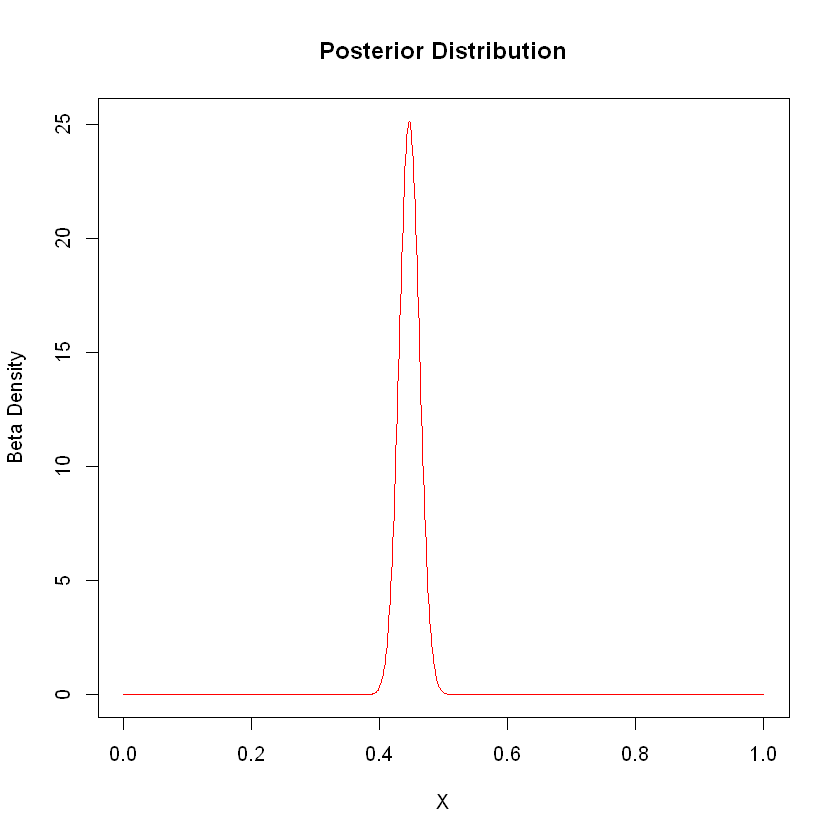

In [3]:
plot(x, beta, xlab="X",
     ylab = "Beta Density", type = "l",
     col = "Red",
    main = "Posterior Distribution") 

Now we are going to generate points according to that distribution, and also the logit transformation of the distribution, that is defined as $logit = log(\theta/(1-\theta))$, and the male-female ratio, defined as $MF = (1-\theta)/\theta$

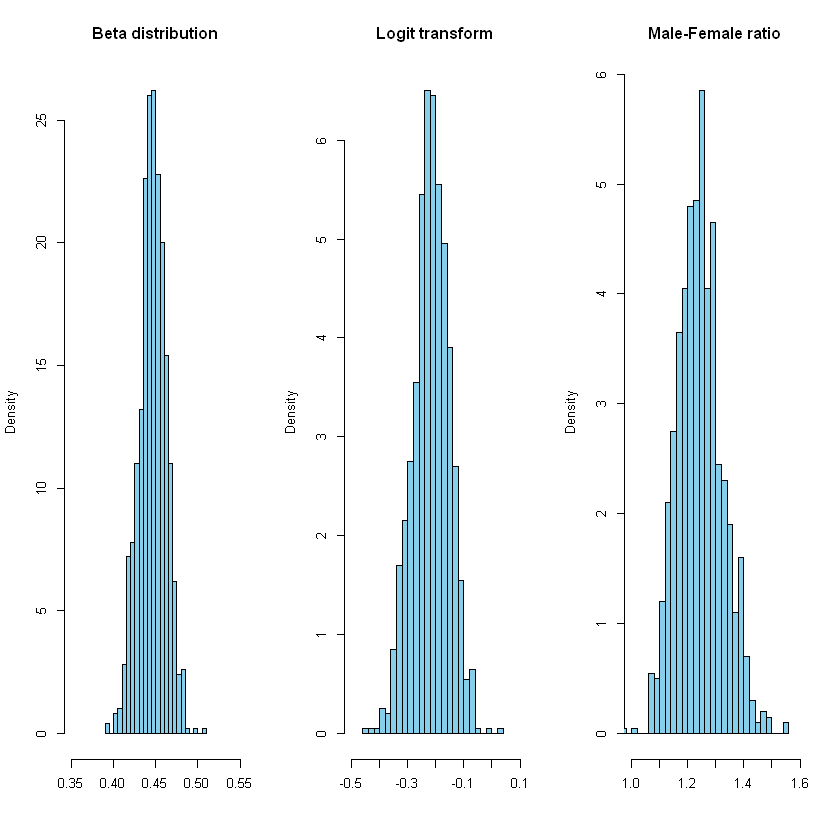

In [4]:
#Posterior distribution, probability of female birth
beta_plot <- rbeta(1000, alpha_posterior,beta_posterior)
log <- log(beta_plot/(1-beta_plot))
ratio <- (1-beta_plot)/beta_plot
par(mfrow = c(1, 3))  # Set up a 1x3 layout for plotting
hist(beta_plot,breaks = as.integer(sqrt(1000)),  freq = FALSE, main = "Beta distribution", xlab = " " , ylab = "Density", col = "skyblue",  xlim = c(0.35, 0.55))
hist(log,breaks = as.integer(sqrt(1000)),  freq = FALSE, main = "Logit transform", xlab = " ", ylab = "Density", col = "skyblue",  xlim = c(-0.5, 0.1))
hist(ratio,breaks = as.integer(sqrt(1000)),  freq = FALSE, main = "Male-Female ratio", xlab = " ", ylab = "Density", col = "skyblue",  xlim = c(1, 1.6))
par(mfrow = c(1, 1))

Let us first take the proportion female population as 0.5, as the paper first suggets. Then we will change this value to 0.485.

In [5]:
lower_quantile <- qbeta(0.025, alpha_posterior,beta_posterior)
upper_quantile <- qbeta(0.975, alpha_posterior,beta_posterior)
cat("The value of the lower quantile is:", round(lower_quantile,3), "\n")
cat("The value of the upper quantile is:", round(upper_quantile,3))

The value of the lower quantile is: 0.415 
The value of the upper quantile is: 0.477

In [6]:
posterior_median <- qbeta(0.5, alpha_posterior, beta_posterior)
cat("The value of the posterior median is:", round(posterior_median,3))

The value of the posterior median is: 0.446

Let us reproduce Figure 2.3 and Table 2.1 in BDA3 [1]. That is, we are going to vary the value of the sum of the parameters of the prior distribution, that is, $\alpha$ and $\beta$.

In [7]:
sum_ab <- c(2,5,10,20,100,200)

In [8]:
total_births <- 980
female_births <- 437
prop_female_population <- 0.485 
alpha_prior <- prop_female_population * sum_ab
beta_prior <- sum_ab-alpha_prior
alpha_posterior <- alpha_prior + female_births
beta_posterior <- beta_prior + total_births - female_births

In [9]:
x <- seq(0,1, by=0.0001)
beta <- dbeta(x,alpha_posterior,beta_posterior)

In [10]:
lower_quantile <- qbeta(0.025, alpha_posterior,beta_posterior)
upper_quantile <- qbeta(0.975, alpha_posterior,beta_posterior)
posterior_median <- qbeta(0.5, alpha_posterior, beta_posterior)
map <- (alpha_posterior -1)/(alpha_posterior+beta_posterior -2) #we consider here the mode of a beta distribution

Let us check the new values of $\alpha$ and $\beta$ (prior parameters) and the consequences of this new parameters:

In [11]:
table <- data.frame(Alpha_Prior = alpha_prior, 
                    Beta_Prior = beta_prior, 
                    Alpha_Beta_Sum = alpha_prior + beta_prior,
                    Posterior_Median = round(posterior_median, 3), 
                    "95interval" = paste("[", round(lower_quantile, 3), ",", round(upper_quantile, 3), "]", sep = ""),
                   MAP = round(map,3))

# Mostrar la tabla
print(table)


  Alpha_Prior Beta_Prior Alpha_Beta_Sum Posterior_Median   X95interval   MAP
1       0.970      1.030              2            0.446 [0.415,0.477] 0.446
2       2.425      2.575              5            0.446 [0.415,0.477] 0.446
3       4.850      5.150             10            0.446 [0.415,0.477] 0.446
4       9.700     10.300             20            0.447 [0.416,0.478] 0.447
5      48.500     51.500            100            0.450  [0.42,0.479] 0.449
6      97.000    103.000            200            0.453 [0.424,0.481] 0.452


Now, we are going to plot the prior and posterior distribution for all the different $\alpha, \beta$ that we have found.

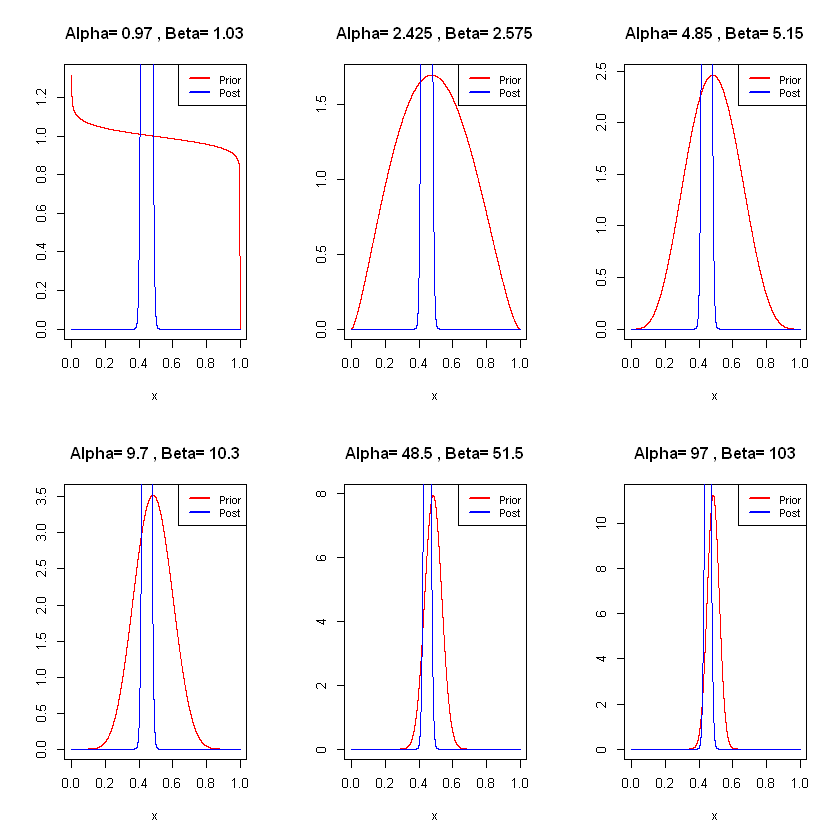

In [12]:
x <- seq(0,1, by=0.0001)

par(mfrow = c(2, 3))

for (i in 1:length(alpha_prior)){
    plot(x,dbeta(x,alpha_prior[i],beta_prior[i]),"l",lwd=1,col="red",xlim=c(0,1),ylab="",main=paste("Alpha=", alpha_prior[i], ", Beta=", beta_prior[i]))
    lines (x,dbeta(x,alpha_posterior[i],beta_posterior[i]),"l",lwd=1,col="blue",xlim=c(0,1),ylim=c(0,1),ylab="")

    legend("topright", legend = c("Prior", "Post"), col = c("red", "blue"), lty = 1, lwd = 2, cex = 0.8)
}

par(mfrow = c(1, 1))

As we can see in the graphs, as the value of alpha prior and beta prior increases, the width of the probability distribution is reduced. This is because if you increase the number of initial measurements, there is more certainty that the distribution will be closer to the mean, which implies that the standard deviation of the distribution will be smaller as we increase the number of initial samples. . This can be seen visually because the maximum value of the distribution is greater for larger values ​​of alpha and beta, so if the integral always has to be equal to 1, that implies that the data are less dispersed.

Now we solve a system so that $h(t)$ and $Beta(\alpha,\beta)$ have the same mean and variance. First, we determine the mean and variance of the nonconjugate distribution, and then we will substiute this value to the mean and variance of a Beta distribution as a function of $\alpha,\beta$.

Recall that the mean and variance of a Beta Distribution are the following:

- $E[x] = \frac{\alpha}{\alpha+\beta}$
- $\sigma^2[x] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

In [13]:
m<-0.485
c<-0.100
p.tails<-0.4
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

In [14]:
x<-seq(0,1,length=100000)
mean_h <- mean(h(x)*x)
variance_h <- mean((x-m)^2*h(x))
cat("Mean of h(t) =", mean_h, ", Variance of h(t) =", variance_h)

Mean of h(t) = 0.4924976 , Variance of h(t) = 0.04261333

Solving the previous system equations we got the following expressions for $\alpha_0$ and $\beta_0$:

In [15]:
alpha0 <- ((1-mean_h)*mean_h^2)/variance_h-mean_h
beta0 <- alpha0*(1-mean_h)/mean_h
cat("Alpha prior =", alpha0, ", Beta prior =", beta0)

Alpha prior = 2.396192 , Beta prior = 2.469197

In [16]:
alpha0_posterior <- alpha0 + female_births
beta0_posterior <- beta0 + total_births - female_births
cat("Alpha posterior =", alpha0_posterior, ", Beta posterior =", beta0_posterior)

Alpha posterior = 439.3962 , Beta posterior = 545.4692

In [17]:
lower_quantile <- qbeta(0.025, alpha0_posterior,beta0_posterior)
upper_quantile <- qbeta(0.975, alpha0_posterior,beta0_posterior)
posterior_median <- qbeta(0.5, alpha0_posterior, beta0_posterior)
map <- (alpha0_posterior -1)/(alpha0_posterior+beta0_posterior -2)
cat("The value of the lower quantile is:", round(lower_quantile,3), "\n")
cat("The value of the upper quantile is:", round(upper_quantile,3), "\n")
cat("The value of the posterior median is:", round(posterior_median,3), "\n")
cat("The value of the MAP is:", round(map,3))

The value of the lower quantile is: 0.415 
The value of the upper quantile is: 0.477 
The value of the posterior median is: 0.446 
The value of the MAP is: 0.446

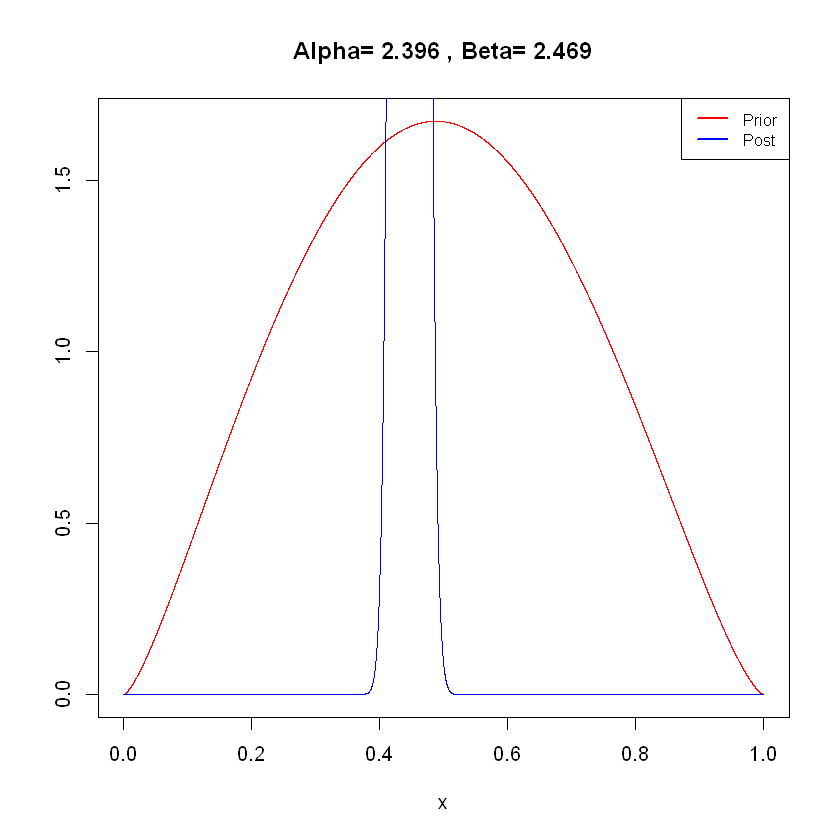

In [18]:
x <- seq(0,1, by=0.0001)
plot(x,dbeta(x,alpha0,beta0),"l",lwd=1,col="red",xlim=c(0,1),ylab="",main=paste("Alpha=", round(alpha0,3), ", Beta=", round(beta0,3)))
lines (x,dbeta(x,alpha0_posterior,beta0_posterior),"l",lwd=1,col="blue",xlim=c(0,1),ylim=c(0,1),ylab="")

legend("topright", legend = c("Prior", "Post"), col = c("red", "blue"), lty = 1, lwd = 2, cex = 0.8)

## 2. Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.

Let us first plot $h(t)$:

In [19]:
n<-980
x<-437
N<-1000 # number of grid intervals
t<-seq(0,1,length=N)
t<-t[-N]# remove last point (equal to 1: we want N intervals)

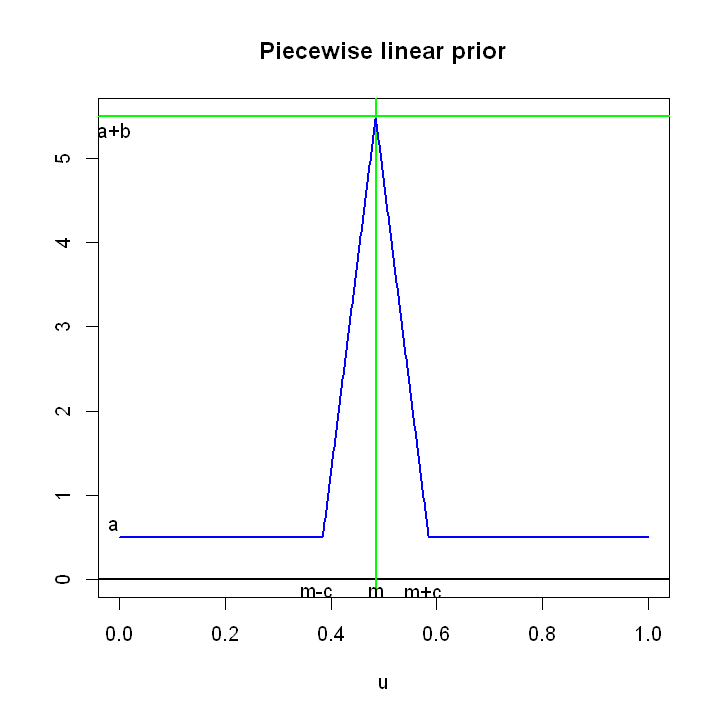

In [20]:
options(repr.plot.width=6,repr.plot.height=6)
u<-seq(0,1,length=N)
plot(u,h(u),"l",lwd=2,col="blue",xlim=c(0,1),ylim=c(0,5.5),ylab="",main="Piecewise linear prior")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(u,h(u),lwd=2,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")

### Discretization method 

In this method, we build $N$ boxes $(t_1,...,t_N)$ that have a width of $\delta = 1/N$ and height $h_i = h(t_i)$. After that, we generate a random number $\omega \in [0,1]$, and localize the box that is associated with it with the cumulative probability function, so that the boxes with a higher value of $h(t)$ are more likely to be selected.

In [21]:
N = 10000
u<-seq(0,1,length=N)
boxes <- (1/N) * sapply(u, h)
cumboxes <- cumsum(boxes)

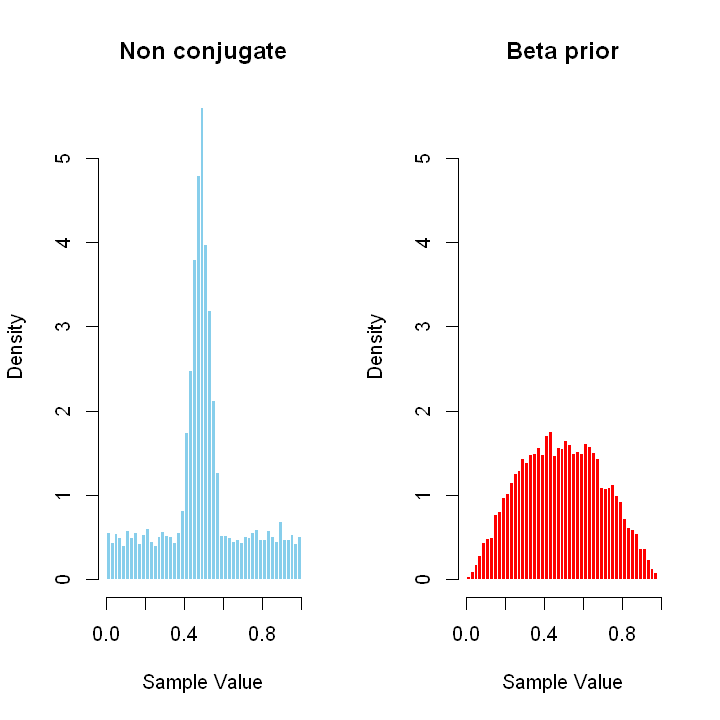

In [22]:
num_samples <- 10000
random_numbers <- runif(num_samples)

# Find the index of the last value in cumboxes that is smaller than each value in the set
indices <- sapply(random_numbers, function(value) {
  idx <- min(which(cumboxes > value))
  if (is.infinite(idx)) {
    print (value)
    print("No valid index found.")
    return(1)  # Return 1 if no valid index is found
  } else {
    return(idx)
  }
})

results <- indices / num_samples


par(mfrow = c(1, 2))  # Reset plotting layout

hist(results, breaks = 50, freq = FALSE, main = "Non conjugate", xlab = "Sample Value", col = "skyblue", border = "white", xlim = c(0, 1), ylim = c(0, 5.5))
betaprior <- rbeta(num_samples,alpha0,beta0)
hist(betaprior, breaks = 50, freq = FALSE, main = "Beta prior", xlab = "Sample Value", col = "red", border = "white", xlim = c(0, 1), ylim = c(0, 5.5))

par(mfrow = c(1, 1))  # Reset plotting layout

We create a function that returns the median, mode, mean and standard deviation of the histogram

In [23]:
array_statistics <- function(array) {

  median_value <- median(array)
  mode_value <- names(sort(table(array), decreasing = TRUE))[1]
  expectation_value <- mean(array)
  standard_deviation_value <- sd(array)
  return(list(
    Median = round(median_value,3),
    Mode = round(as.numeric(mode_value),3),
    Expectation = round(expectation_value,3),
    Standard_Deviation = round(standard_deviation_value,3)
  ))
}

In [24]:
array_statistics(results)

$Median
[1] 0.486

$Mode
[1] 0.487

$Expectation
[1] 0.493

$Standard_Deviation
[1] 0.207

In [25]:
array_statistics(betaprior)

$Median
[1] 0.487

$Mode
[1] 0.006

$Expectation
[1] 0.488

$Standard_Deviation
[1] 0.208

As we can see, the expectation, median and standard deviation are quite similar, since we set $\alpha_0, \beta_0$ to satisfy that they have the same mean and standard deviation as the nonconjugate distribution.

### Inverse transformation method

The idea of this method is to obtain the probability distribution from the analytic cumulative function, so here we don't discretize the probabilities. We generate a random number $\omega \in [0,1]$, and determine the inverse image of it, that is the probablity associated with first, we define the cumulative function of h(t) to plot it and see its behaviour. 

In [26]:
cumh<-function(t){return(a*t*(t>=0)*(t<m-c)+(a*t+b*c)*(t>m+c)*(t<=1)+(a*t+b/c*(t-(m-c))*(t-(m-c))/2)*(t>m-c)*(t<m)+(a*t+b*c-(m+c-t)*(m+c-t)*b/c/2)*(t>m)*(t<m+c))}

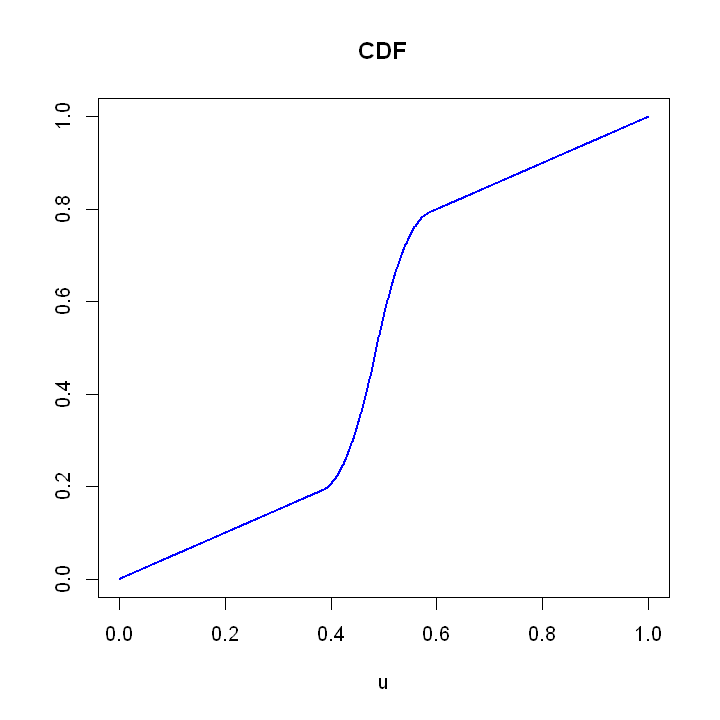

In [27]:
N = 1000
u<-seq(0,1,length=N)
plot(u,cumh(u),"l",lwd=2,col="blue",xlim=c(0,1),ylim=c(0,1),ylab="",main="CDF")


We define the cumulative inverse distribution as a piecewise defined function, just as we did on the definition of $h(t)$. The solution we are going to solve for each section is (where $\omega$ is the random number and $x$ the associated value of the cumulative inverse function:

- $\omega = ax$     if     $\omega \in [0,a(m-c))$
- $\omega = ax + \frac{b}{2c}(x-(m-c))^2$     if        $\omega \in [a(m-c),am+\frac{cb}{2})$
- $\omega = ax + \frac{cb}{2} + b(x-m) - \frac{b}{2c}(x-m)^2$      if        $\omega \in [am+\frac{cb}{2},a(m+c)+cb)$
- $\omega = ax + cb$             if        $\omega \in [a(m+c)+cb,1]$

In [28]:
cumhinv <- function(y) {
  if ((y >= 0) && (y < (a * (m - c)))) {
    return (y / a)
  } 
    else if (y >= a * (m - c) && y < a * m + c * b / 2) {
    return ((sqrt(c) * sqrt(a^2 * c + 2 * a * b * c - 2 * a * b * m + 2 * b * y) - a * c - b * c + b * m) / b)
  } 
    else if (y >= a * m + c * b / 2 && y < a * (m + c) + b*c) {
    r = y -  (a * m + c * b / 2)
    A <- -b/(2*c)
    B <- a+b
    C <- -r
    coeficientes <- c(A,B,C)
    raices <- polyroot(coeficientes)
    raices <- 1/raices
    raices_reales_positivas <- Re(raices[which(abs(Im(raices)) < 1e-8 & Re(raices) <= c)])
    xaux <- raices_reales_positivas
    return (xaux+m)
  } 
    else if (y >= (a * (m + c) + b*c) && y <= 1) {
    return ((y - b * c) / a)
  } 
    else {
    return (NA)  # To handle cases outside the defined range
  }
}

Plot of the cumulative invrse distribution. It should be the inverse function of the cumulative distribution

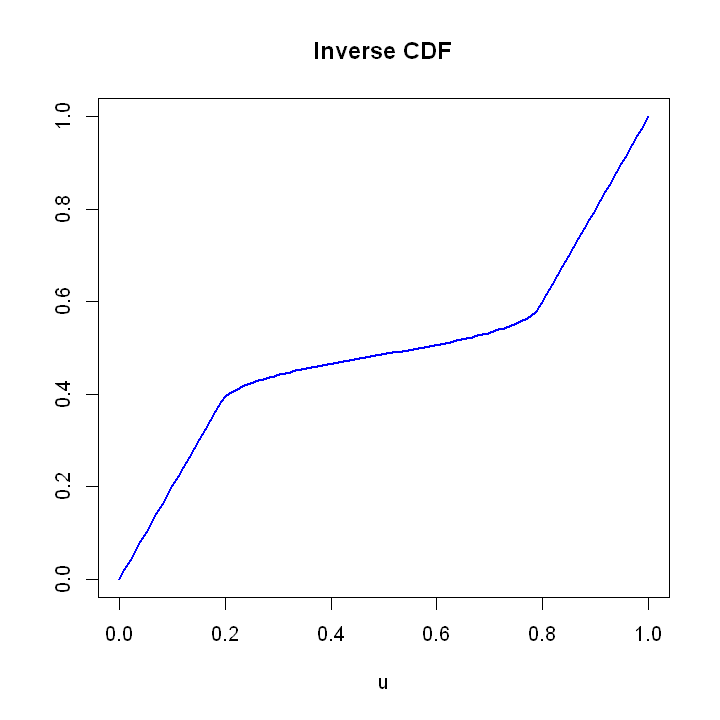

In [29]:
N = 100
u<-seq(0,1,length=N)
# print (calculate_xaux(u, m, cvar, a, b))
plot(u, sapply(u, cumhinv),"l",lwd=2,col="blue",xlim=c(0,1),ylab="",main="Inverse CDF")

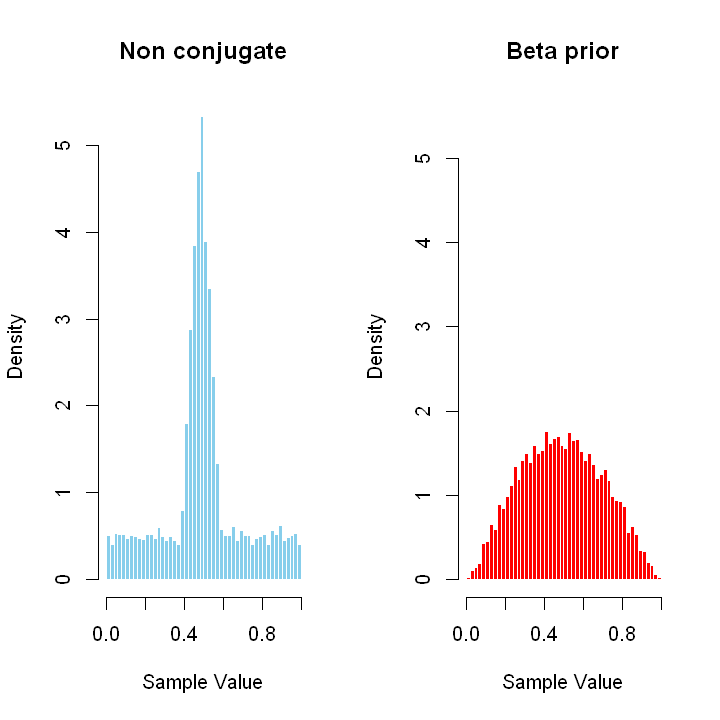

In [30]:
num_samples <- 10000
random_numbers <- runif(num_samples)

# Use cumhinv function to transform the random numbers
samples <- sapply(random_numbers, cumhinv)

# Plot the histogram of generated samples
par(mfrow = c(1, 2))  # Set up a 1x3 layout for plotting


hist(samples, breaks = 50, freq = FALSE, main = "Non conjugate", xlab = "Sample Value", col = "skyblue", border = "white")
betaprior <- rbeta(num_samples,alpha0,beta0)
hist(betaprior, breaks = 50, freq = FALSE, main = "Beta prior", xlab = "Sample Value", col = "red", border = "white", xlim = c(0, 1), ylim = c(0, 5.5))

par(mfrow = c(1, 1))  # Reset plotting layout

As before, we compute the median, mode, expectation, standard deviation statistics: 

In [31]:
array_statistics (samples)

$Median
[1] 0.486

$Mode
[1] 0

$Expectation
[1] 0.493

$Standard_Deviation
[1] 0.204

In [32]:
array_statistics (betaprior)

$Median
[1] 0.486

$Mode
[1] 0.01

$Expectation
[1] 0.489

$Standard_Deviation
[1] 0.206

As we can see, the expectation, median and standard deviation are quite similar, since we set $\alpha_0, \beta_0$ to satisfy that they have the same mean and standard deviation as the nonconjugate distribution. Knowing that we are generating numbers in a continous set, the mode has no sense at all, since the probability of getting exactly the same probability (the value) twice is 0.

## 3. Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 1. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.


Using the Bayes theorem, we can determine he posterior predictive pmf $p(\theta | X) \propto p(X|\theta) · p(\theta)$, where $p(X|\theta)$ is the likelihood function, that in the case of a binomial problem, can be obtained as $p(X|\theta) = \theta ^\alpha(1-\theta)^\beta$. After that, we simply normalize the obtained function

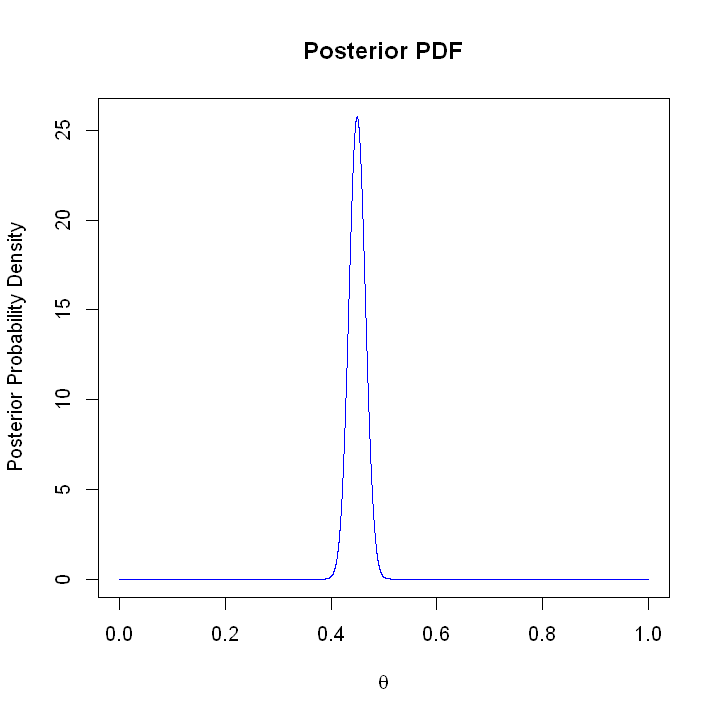

In [33]:
likelihood <- function(theta, alpha, beta) {
  return (theta^alpha * (1 - theta)^beta)
}

alpha <- 437 # Number of successes
beta <- 980-437  # Number of failures
N = 10000
theta <- seq(0, 1, length=N) 

# Calculate the unnormalized posterior distribution
unnormalized_posterior <- likelihood(theta, alpha, beta) * h(theta)

# Normalize the posterior distribution
posterior <- N*(unnormalized_posterior / sum(unnormalized_posterior))

plot(theta, posterior, type = "l", col = "blue", 
     xlab = expression(theta), ylab = "Posterior Probability Density",
     main = "Posterior PDF")

As we did in previous parts, we build histograms of the posterior pdf of the nonconjugate and the conjugate distributions starting from a random sample.

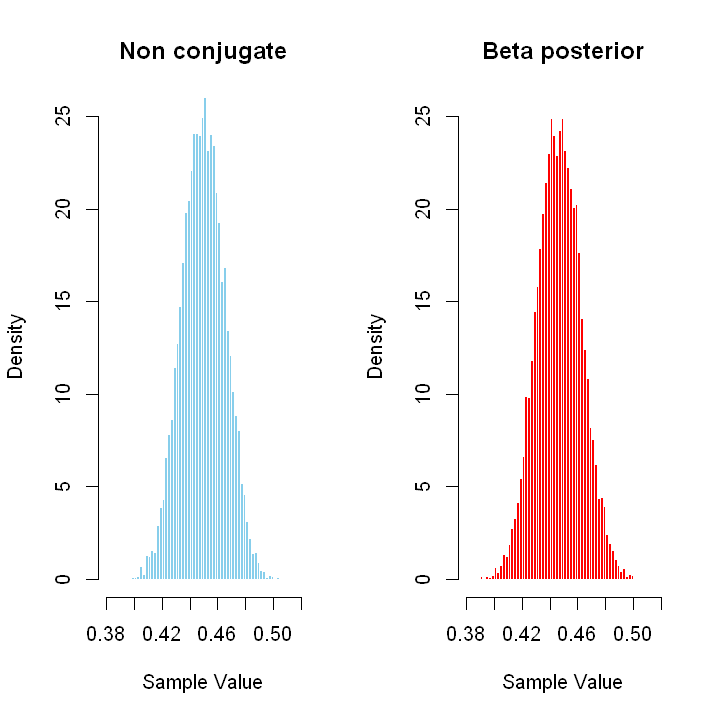

In [34]:
num_samples = 10000
random_numbers <- runif(num_samples)
cumposterior <- cumsum(posterior/N)

# Find the index of the last value in cumposterior that is smaller than each value in the set
indices <- sapply(random_numbers, function(value) {
  idx <- max(which(cumposterior <= value))
  if (is.infinite(idx)) {
    print (value)
    print("No valid index found.")
    return(0)  # Return 0 if no valid index is found
  } else {
    return(idx)
  }
})

results <- indices / num_samples
par(mfrow = c(1, 2))

hist(results, breaks = 50, freq = FALSE, main = "Non conjugate", xlab = "Sample Value", col = "skyblue", border = "white", xlim = c(0.38, 0.52), ylim = c(0, 25))
beta_posterior <- rbeta(num_samples,alpha0_posterior,beta0_posterior)
hist(beta_posterior, breaks = 50, freq = FALSE, main = "Beta posterior", xlab = "Sample Value", col = "red", border = "white", xlim = c(0.38, 0.52), ylim = c(0, 25))

par(mfrow = c(1, 1)) 

Finally, we show once again the mean, standard deviation, mode and median. As we could notice, since the posterior probability distributions are quite similar, one can expect that these variables would be similar too.

In [35]:
array_statistics(results)

$Median
[1] 0.45

$Mode
[1] 0.444

$Expectation
[1] 0.449

$Standard_Deviation
[1] 0.015

In [36]:
array_statistics(beta_posterior)

$Median
[1] 0.446

$Mode
[1] 0.382

$Expectation
[1] 0.447

$Standard_Deviation
[1] 0.016

## Exercise 2: Asthma mortality

This exercise pertains to `Poisson.01.pub.ipynb` (lecture 7). Review this notebook as well as the notes concerning the Poisson model and do the following:

 1. Generate a sample from the prior predictive distribution.

 2. Generate a sample from the posterior predictive distribution after the first experiment (with $y=3$ after one year in a population of 200,000).

In both cases plot the simulated pmf and compare it with the theoretical one and estimate the probability of having more than 25 fatalities in the next 10 years (assuming all other conditions remain constant).

## 1. Generate a sample from the prior predictive distribution.

Let us start computing a sample from the prior predictive distribution and compare it with the theoretical one. We will set the number of the sample to $10000$.

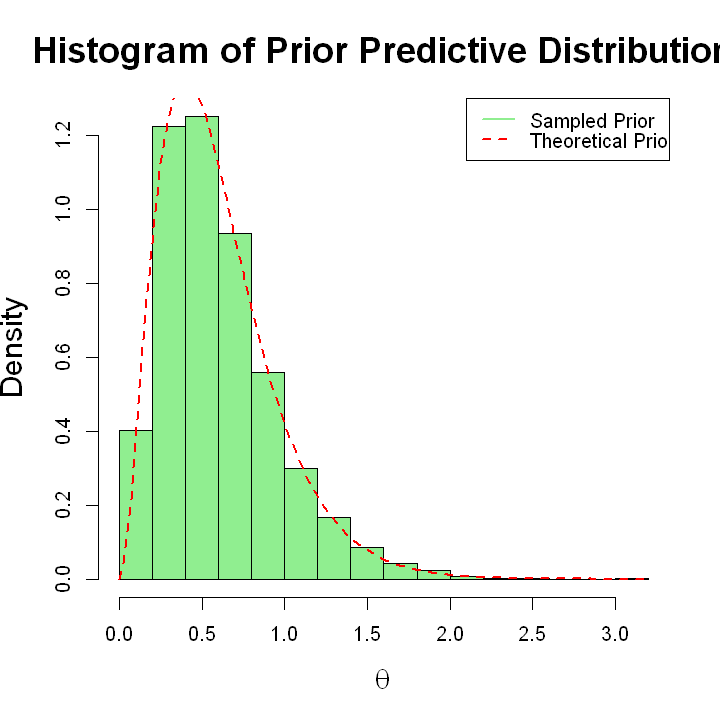

In [37]:
#EXERCISE 2.1: Prior Predictive Distribution.

library(stats)
library(graphics)
set.seed(42)

#Prior distribution parameters according to theta~Gamma(alpha,beta) such that Gamma.expectation = alpha/beta = 0.6
N <- 10000
alpha_prior <- 3
beta_prior <- 5

#Sample and histogram of the prior distribution
prior <- rgamma(N,alpha_prior,beta_prior)

hist(prior, col="LightGreen", freq=FALSE, xlab=expression(theta), cex.lab=1.5,
     main="Histogram of Prior Predictive Distribution", cex.main=1.8)

#The theoretical prior distribution
curve(dgamma(x, alpha_prior,beta_prior), add = TRUE, col = "red", lwd = 2, lty = 2)

legend("topright", legend=c("Sampled Prior", "Theoretical Prior"), 
       col=c("lightgreen", "red"), lwd=2, lty=c(1,2))

Let us see what are the mean and variance of the prior distribution:

In [38]:
prior_mean <- alpha_prior/beta_prior
prior_var <- alpha_prior/beta_prior^2
cat("The mean of the prior is:", round(prior_mean,2), "with a variance of", round(prior_var,2))

The mean of the prior is: 0.6 with a variance of 0.12

In order to estimate the probability of having more than $25$ fatalities in the text $10$ years we will consider the $\theta$ values from the prior distribution ($2$ times) as the $\lambda$ parameter of our $Poisson$ distribution. As in every year (among the $10$ years) we assume that all the conditions remain constant, we will generate $10$ samples of the $Poisson$ distribution, and repeat this for every $\lambda$ value obtained before (so $N = 10000$ times). Once this calculated, we will add up all the deaths within these $10$ years (per each $\lambda$, so each row) and finally calcuate how many times (the sum) is greater than $25$.


In [39]:
lambda <- 2*prior
years <- 10 
matrix <- replicate(years, rpois(N, lambda))
pois_results <- rowSums(matrix)
probability <- mean(pois_results > 25)
cat("The estimated probability of having more than 25 fatalities in the next 10 years is:" ,probability)

The estimated probability of having more than 25 fatalities in the next 10 years is: 0.0632

## 2. Generate a sample from the posterior predictive distribution after the first experiment (with $y=3$ after one year in a population of 200,000).

Recall that the posterior distribution of $\theta$ for a $\textrm{Gamma}(\alpha,\beta)$ prior distribution is $\textrm{Gamma}(\alpha_{1},\beta_{1})$,

$$
    \left\{\begin{array}{lcl}
    \alpha_{1} &= &\alpha+y,\\[0.2cm]
    \beta_{1}  &=&\beta+x.
    \end{array}\right.
$$

With the prior distribution and data described notation, ($y = 3$, $x = 2.0$), the posterior distribution for $\theta$ is $\textrm{Gamma}(6.0, 7.0)$.

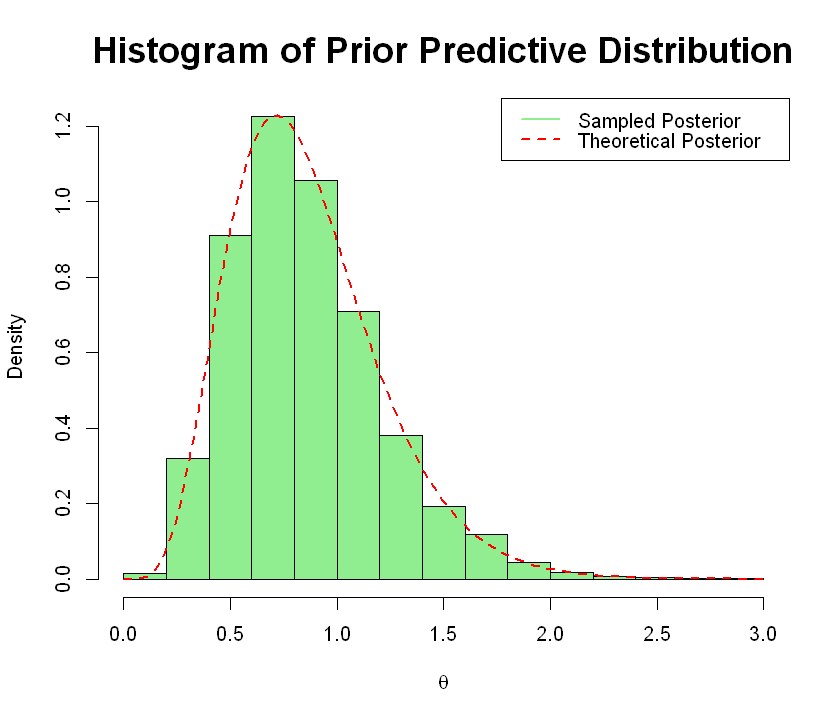

In [40]:
#EXERCISE 2.2: Posterior Predictive Distribution.

N<- 10000
y<- 3
x_1 <- 2 #since theta is defined in units of 100,000 people

alpha_posterior <- alpha_prior + y
beta_posterior <- beta_prior + x_1

#Sample and histogram of the posterior predictive distribution
posterior <- rgamma(N, alpha_posterior, beta_posterior)
options(repr.plot.width=7,repr.plot.height=6)
hist(posterior,col="LightGreen",freq=FALSE,  xlab=expression(theta), main="Histogram of Prior Predictive Distribution",cex.main=1.8)
#The theoretical posterior distribution
curve(dgamma(x, alpha_posterior,beta_posterior), add = TRUE, col = "red", lwd = 2, lty = 2)

legend("topright", legend=c("Sampled Posterior", "Theoretical Posterior"), 
       col=c("lightgreen", "red"), lwd=2, lty=c(1,2))

Let us see what are the mean and variance of the posterior distribution:

In [41]:
posterior_mean <- alpha_posterior/beta_posterior
posterior_var <- alpha_posterior/(beta_posterior)^2
cat("The mean of the prior is:", round(posterior_mean,2), "with a variance of", round(posterior_var,2))

The mean of the prior is: 0.86 with a variance of 0.12

Note that the mean of this distribution is greater than the previous one. We expected this result because now we are adding the observed evidence, where the fatalitites after one year are 3. Hence, we expect again to obtain a higher probability with this distribution than before. Let us check it. We will repeat the same methodology than before: 

In [42]:
lambda <- 2*posterior
years <- 10 
matrix <- replicate(years, rpois(N, lambda))
pois_results <- rowSums(matrix)
probability <- mean(pois_results > 25)
cat("The estimated probability of having more than 25 fatalities in the next 10 years is:" ,probability)

The estimated probability of having more than 25 fatalities in the next 10 years is: 0.147